In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Main analysis
from helpers import database_helper
import pandas as pd

import matplotlib.pyplot as plt

# Getting the data setup for use
database_helper.load_data()
df_passengers_mishandled = pd.read_sql_table('airline_passenger_mishandles', database_helper.db).dropna().set_index('Id')
df_items_mishandled = pd.read_sql_table('airline_items_mishandles', database_helper.db).dropna().set_index('Id')
df_quarterly_nums = pd.read_sql_table('airline_quarterly_numbers', database_helper.db).dropna().set_index('Id')
df_fares = pd.read_sql_table('connecting_market_fare_info', database_helper.db).set_index('Id')
df_fares_multi = pd.read_sql_table('connecting_market_fare_info_MultiCarrier', database_helper.db).set_index('Id')


In [2]:
# Tells us about the mishandled passengers
df_passengers_mishandled = df_passengers_mishandled.drop_duplicates()
df_passengers_mishandled['PerDenied'] = df_passengers_mishandled['TotalDenied']/df_passengers_mishandled['TotalBoarding']*100
df_passengers_mishandled['PerComped'] = df_passengers_mishandled['NumComp']/df_passengers_mishandled['TotalBoarding']*100
df_passengers_mishandled['PerMishandled'] = (df_passengers_mishandled['TotalDenied']+df_passengers_mishandled['NumComp']+df_passengers_mishandled['NumDowngraded']+df_passengers_mishandled['NumUpgraded'])/df_passengers_mishandled['TotalBoarding']*100
df_passengers_mishandled['unique_id'] = df_passengers_mishandled['Year'].astype(str) + df_passengers_mishandled['Quarter'].astype(str) +df_passengers_mishandled['OpAirlineCode']
df_passengers_mishandled

,CompPaid,MktAirlineCode,Month,NumComp,NumDowngraded,NumUpgraded,OpAirlineCode,Quarter,TotalBoarding,TotalDenied,Year,PerDenied,PerComped,PerMishandled,unique_id
Id,,,,,,,,,,,,,,,
2020-03-Q1-DL-9E,0,DL,3,7550,4020,11686,9E,1,5928498,15706,2020,0.264924,0.127351,0.657199,202019E
2020-03-Q1-AA-AA,716301,AA,3,13908,895,351,AA,1,39047799,1246,2020,0.003191,0.035618,0.042000,20201AA
2020-03-Q1-AS-AS,64249,AS,3,2010,18,152,AS,1,8621461,170,2020,0.001972,0.023314,0.027258,20201AS
2020-03-Q1-UA-AX,0,UA,3,464,0,0,AX,1,585826,0,2020,0.000000,0.079204,0.079204,20201AX
2020-03-Q1-B6-B6,137640,B6,3,250,157,0,B6,1,7303799,157,2020,0.002150,0.003423,0.007722,20201B6
2020-03-Q1-UA-C5,0,UA,3,614,0,0,C5,1,466376,0,2020,0.000000,0.131653,0.131653,20201C5
2020-03-Q1-DL-CP,0,DL,3,442,181,1282,CP,1,360840,1463,2020,0.405443,0.122492,0.933378,20201CP
2020-03-Q1-DL-DL,0,DL,3,16399,10222,23947,DL,1,27870231,34169,2020,0.122600,0.058841,0.304041,20201DL
2020-03-Q1-F9-F9,20530,F9,3,510,0,0,F9,1,4685687,0,2020,0.000000,0.010884,0.010884,20201F9


In [3]:
# Tells us about mishandled items
df_items_mishandled['PerMishandledItems'] = (df_items_mishandled['MishandledBags']+df_items_mishandled['MishandledChairs'])/(df_items_mishandled['TotalBags']+df_items_mishandled['TotalChairs']) * 100
df_items_mishandled['PerMishandledBags'] = df_items_mishandled['MishandledBags']/df_items_mishandled['TotalBags'] * 100
df_items_mishandled['PerMishandledChairs'] = df_items_mishandled['MishandledChairs']/df_items_mishandled['TotalChairs'] * 100
df_items_mishandled['unique_id'] = df_items_mishandled['Year'].astype(str) + df_items_mishandled['Quarter'].astype(str) +df_items_mishandled['AirlineCode']
df_items_mishandled

,AirlineCode,MishandledBags,MishandledChairs,Month,Quarter,TotalBags,TotalChairs,Year,PerMishandledItems,PerMishandledBags,PerMishandledChairs,unique_id
Id,,,,,,,,,,,,
2020-01-Q1-9E,9E,4453,8,1,1,901600,961,2020,0.494260,0.493900,0.832466,202019E
2020-01-Q1-AA,AA,74975,188,1,1,9727580,9900,2020,0.771894,0.770747,1.898990,20201AA
2020-01-Q1-AS,AS,15101,24,1,1,2289227,2219,2020,0.660064,0.659655,1.081568,20201AS
2020-01-Q1-B6,B6,5006,31,1,1,1272589,2863,2020,0.394919,0.393371,1.082780,20201B6
2020-01-Q1-DL,DL,37254,110,1,1,8276650,12967,2020,0.450733,0.450110,0.848307,20201DL
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-Q4-OO,OO,6282,10,4,4,1363293,1521,2020,0.461015,0.460796,0.657462,20204OO
2020-04-Q4-UA,UA,12731,32,4,4,2963812,3932,2020,0.430057,0.429548,0.813835,20204UA
2020-04-Q4-WN,WN,15485,53,4,4,5386803,3501,2020,0.288258,0.287462,1.513853,20204WN


In [4]:
# The Quarterly numbers
df_quarterly_nums['unique_id'] = df_quarterly_nums['Year'].astype(str) + df_quarterly_nums['Quarter'].astype(str) +df_quarterly_nums['Carrier']
df_quarterly_nums

,Carrier,ItemName,Quarter,Value,Year,unique_id
Id,,,,,,
2020-1-B6-Debt to Total Investment,B6,Debt to Total Investment,1,3.385220e-01,2020,20201B6
2020-2-B6-Actual,B6,Actual,2,7.713500e-01,2020,20202B6
2020-3-G4-Times Interest Earned,G4,Times Interest Earned,3,-6.047709e-01,2020,20203G4
2020-4-F9-Times Interest Earned,F9,Times Interest Earned,4,-5.262710e+01,2020,20204F9
2020-4-5Y-Operating Revenues,5Y,Operating Revenues,4,2.745361e+09,2020,202045Y
...,...,...,...,...,...,...
2020-3-AS-Operating Profit (Loss) per RTM,AS,Operating Profit (Loss) per RTM,3,-6.157122e-01,2020,20203AS
2020-3-AS-Operating Expense per ATM,AS,Operating Expense per ATM,3,1.333860e+00,2020,20203AS
2020-3-AS-Passenger Revenue per RPM,AS,Passenger Revenue per RPM,3,1.264672e-01,2020,20203AS


In [5]:
# Q1 profits for the airline with a unique Id that we'll use to merge things together
airline_quarterly_numbers = pd.read_sql_query('SELECT ItemName, Carrier, Value, Quarter, Year, al.Name FROM airline_quarterly_numbers join airlines AS al ON airline_quarterly_numbers.Carrier = al.Code WHERE Quarter=1 AND ItemName = "Operating Profit (Loss)"', database_helper.db).drop_duplicates()
airline_quarterly_numbers['unique_id'] = airline_quarterly_numbers['Year'].astype(str) + airline_quarterly_numbers['Quarter'].astype(str) +airline_quarterly_numbers['Carrier']
pd.pivot_table(airline_quarterly_numbers, values='Value', index=['unique_id'])


,Value
unique_id,
20201AA,1.655507e+08
20201AS,7.524820e+08
20201B6,5.900749e+08
20201DL,5.213264e+09
20201EV,-7.273547e+07
20201F9,1.788540e+08
20201G4,2.877333e+08
20201HA,2.286441e+08
20201MQ,3.596354e+06


<Axes: title={'center': 'Profits per Passenger/Airline'}, xlabel='AirlineCode'>

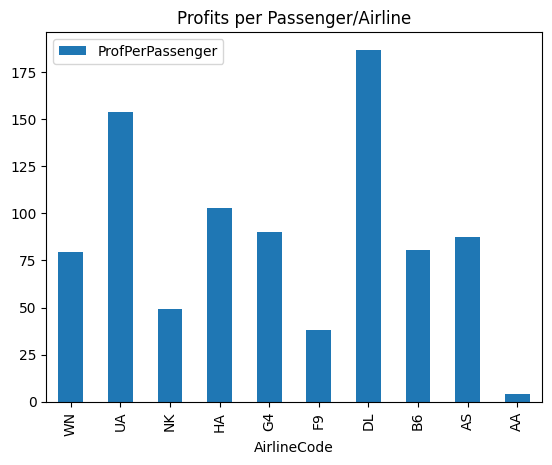

In [6]:
#Beginning primary analysis

compare_profits = df_items_mishandled.merge(pd.pivot_table(airline_quarterly_numbers, values='Value', index=['unique_id']), left_on=['unique_id'], right_on=['unique_id'], how='left').rename(columns={'Value':'Profit'})
passengers_mishandled = df_passengers_mishandled[['TotalBoarding', 'NumComp', 'TotalDenied', 'unique_id', 'PerComped', 'PerDenied', 'PerMishandled']]
compare_profits = compare_profits.merge(passengers_mishandled, left_on=['unique_id'], right_on=['unique_id'], how='left').drop_duplicates().set_index('unique_id').dropna()
compare_profits['ProfPerPassenger'] = compare_profits['Profit']/compare_profits['TotalBoarding']
compare_profits['AdjustedProfPer'] = compare_profits['ProfPerPassenger'] * (1-compare_profits['PerMishandled']/100)
compare_profits = compare_profits.sort_values(by='AirlineCode', ascending=False)
graph_compare_profits = compare_profits[[ 'AirlineCode', 'ProfPerPassenger']]
graph_compare_profits.drop_duplicates().plot.bar(x='AirlineCode', y='ProfPerPassenger', title='Profits per Passenger/Airline')



<Axes: title={'center': '% Mishandled Passengers Per Airline'}, xlabel='AirlineCode'>

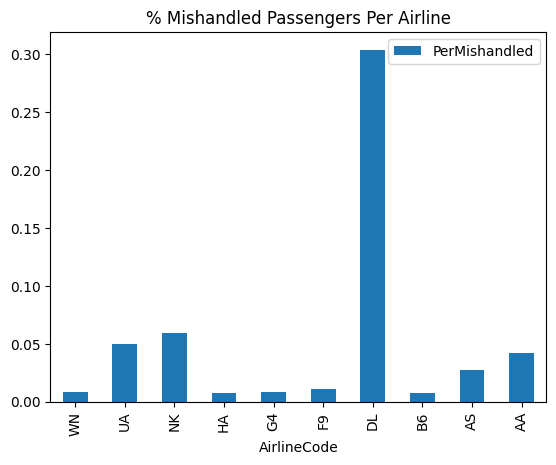

In [7]:
graph_compare_adjusted = compare_profits[['AirlineCode', 'PerMishandled']]
graph_compare_adjusted.drop_duplicates().plot.bar(x='AirlineCode', title='% Mishandled Passengers Per Airline')

<Axes: title={'center': '% Mishandled Bags & Chairs Per Airline'}, xlabel='AirlineCode'>

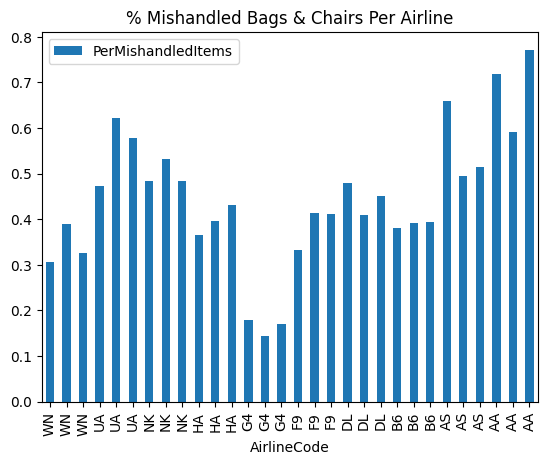

In [10]:
graph_compare_items_lost = compare_profits[['AirlineCode','PerMishandledItems']]
graph_compare_items_lost.drop_duplicates().plot.bar(x='AirlineCode', title='% Mishandled Bags & Chairs Per Airline')